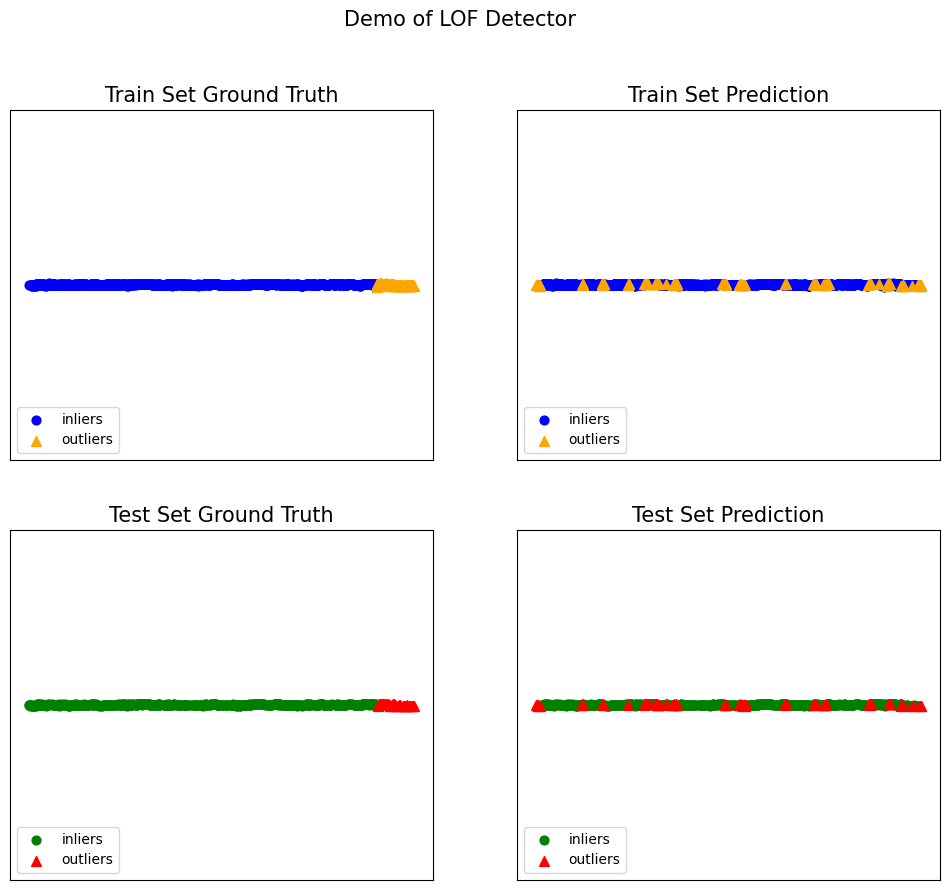

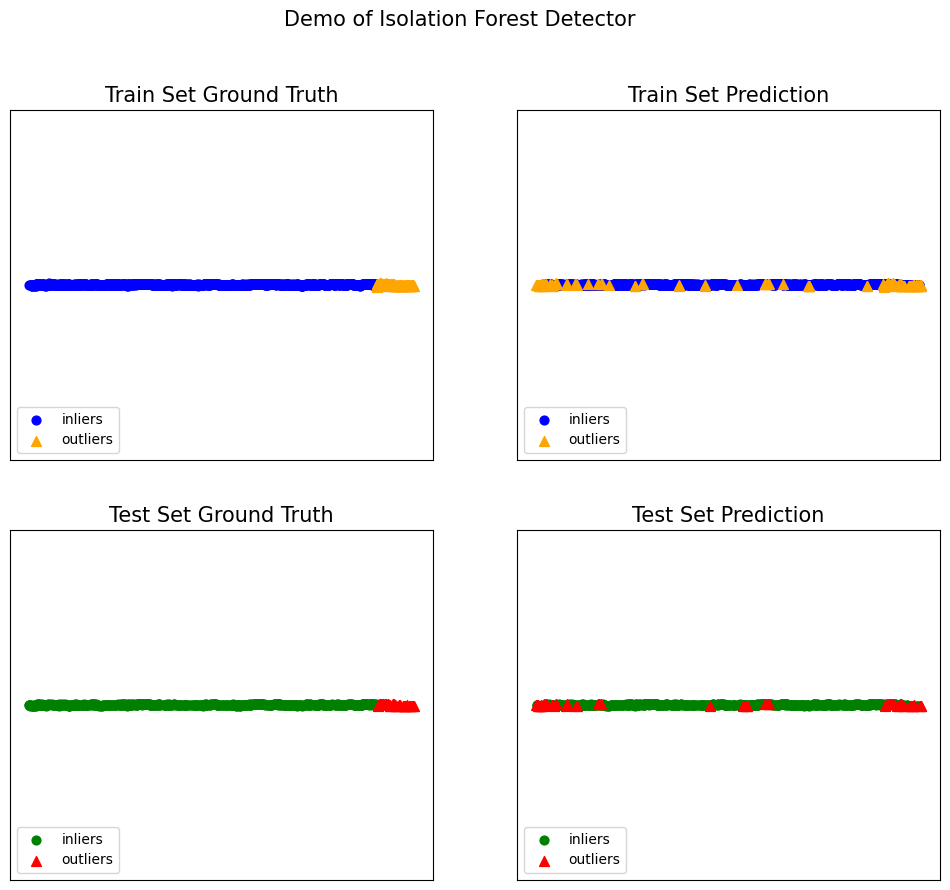

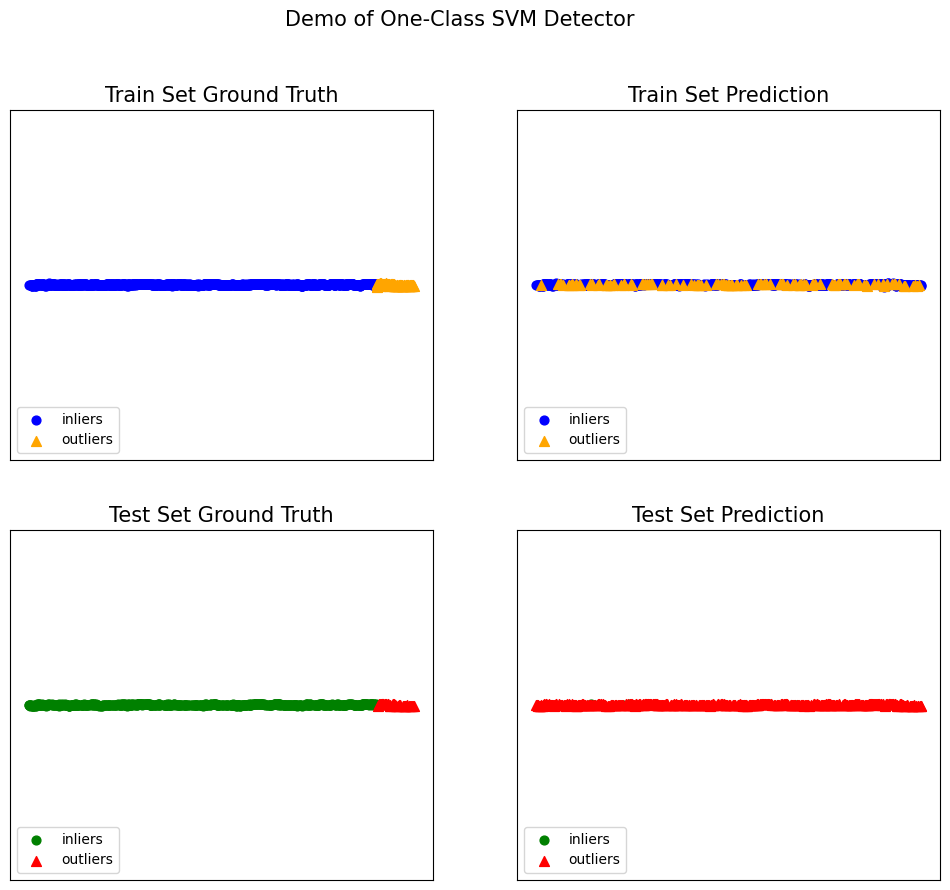

Evaluation Results:
                    ROC-AUC  Average Precision
LOF               0.566093           0.132539
Isolation Forest  0.938031           0.479624
One-Class SVM     0.515122           0.105992


In [3]:
import pandas as pd
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize
from sklearn.decomposition import PCA

df = pd.read_csv('cardio.csv')

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lof = LOF()
iforest = IForest()
ocsvm = OCSVM()

models = {'LOF': lof, 'Isolation Forest': iforest, 'One-Class SVM': ocsvm}

results = {}

for model_name, model in models.items():
    model.fit(X_train_pca)
    y_test_scores = model.decision_function(X_test_pca)
    y_test_pred = model.predict(X_test_pca)

    roc_auc = roc_auc_score(y_test, y_test_scores)
    avg_precision = average_precision_score(y_test, y_test_scores)

    results[model_name] = {'ROC-AUC': roc_auc, 'Average Precision': avg_precision}

    visualize(model_name, X_train_pca, y_train, X_test_pca, y_test, model.labels_, y_test_pred, show_figure=True, save_figure=False)

results_df = pd.DataFrame(results).transpose()

print("Evaluation Results:\n", results_df)


In [5]:
df = pd.read_csv('cardio.csv')

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lof = LOF()
iforest = IForest()
ocsvm = OCSVM()

models = {'LOF': lof, 'Isolation Forest': iforest, 'One-Class SVM': ocsvm}

results = {}

for model_name, model in models.items():
    model.fit(X_train)
    y_test_scores = model.decision_function(X_test)
    y_test_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_test_scores)
    avg_precision = average_precision_score(y_test, y_test_scores)

    results[model_name] = {'ROC-AUC': roc_auc, 'Average Precision': avg_precision}

results_df = pd.DataFrame(results).transpose()

print("Evaluation Results:\n", results_df)

Evaluation Results:
                    ROC-AUC  Average Precision
LOF               0.590500           0.194928
Isolation Forest  0.944249           0.621498
One-Class SVM     0.604543           0.211430
